In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Understanding

In [2]:
df = pd.read_csv('../dataset/bank.csv')
print('shape: ', df.shape)
print('columns: ', df.columns.tolist())
print(df.info())

FileNotFoundError: [Errno 2] No such file or directory: '../dataset/bank.csv'

In [ ]:
print(df.describe())


                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


## EDA

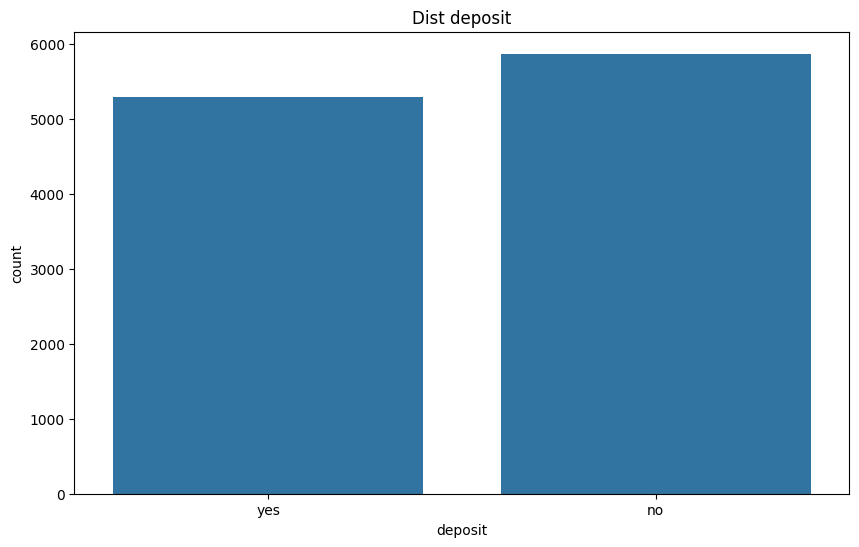

In [ ]:
# deposit
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x='deposit')
plt.title('Dist deposit')
plt.show()

In [ ]:
print(df['deposit'].value_counts(normalize=True))

deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


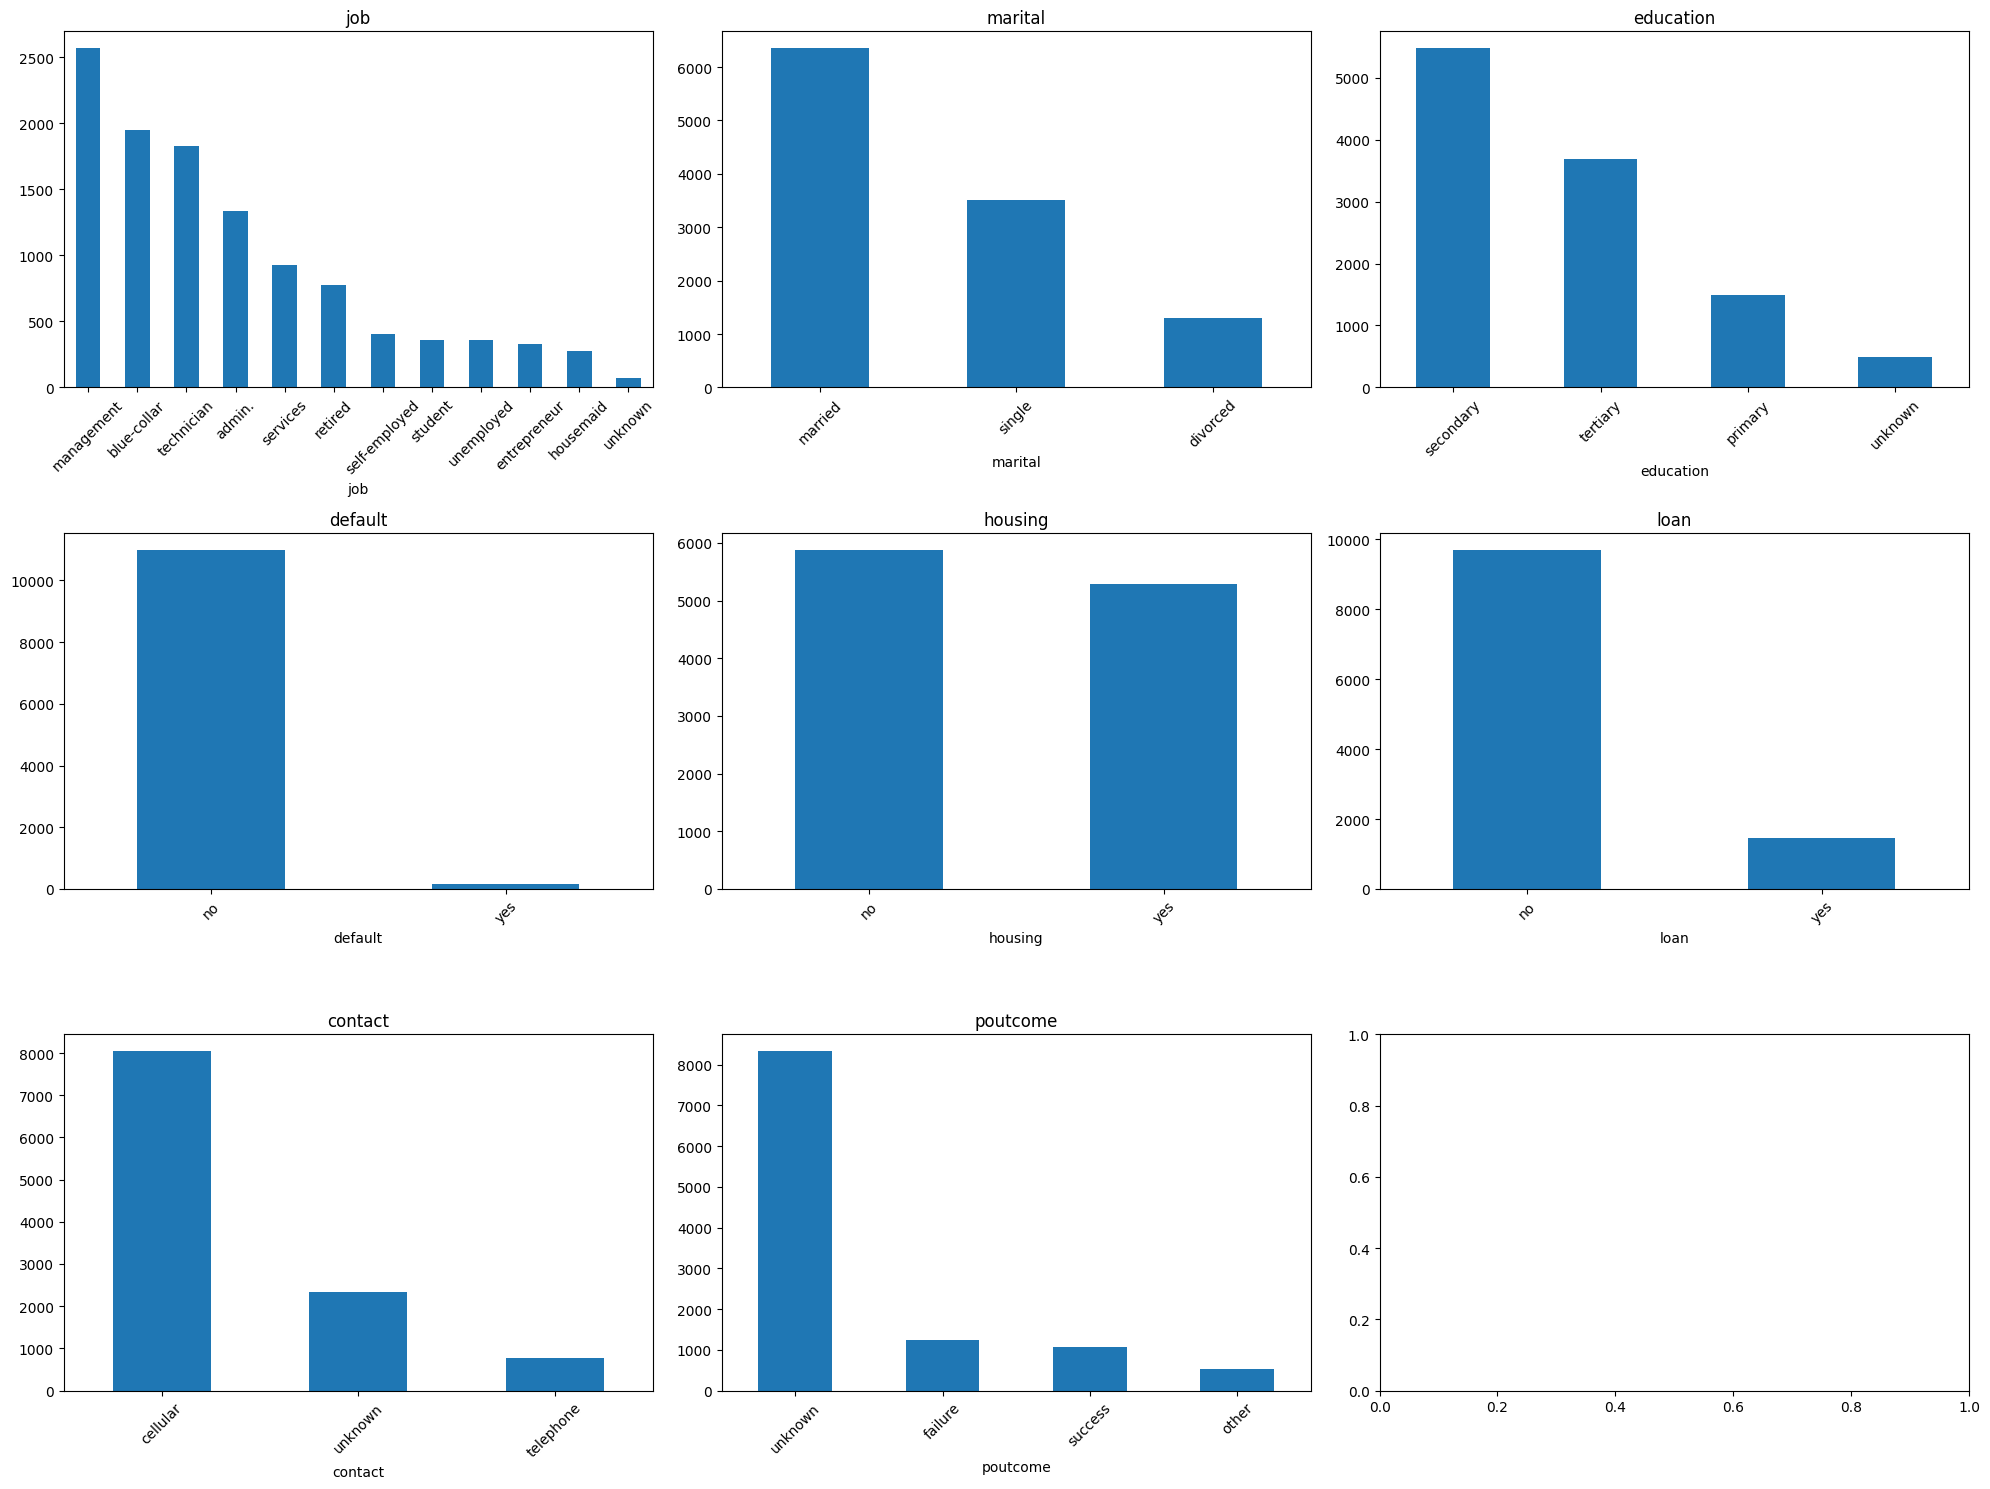

In [ ]:
cat_columns =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # 2D
axes = axes.ravel()  # convert 1D
for i, col in enumerate(cat_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], title=col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()  # تنظيم المسافات بين ال grids
plt.show()

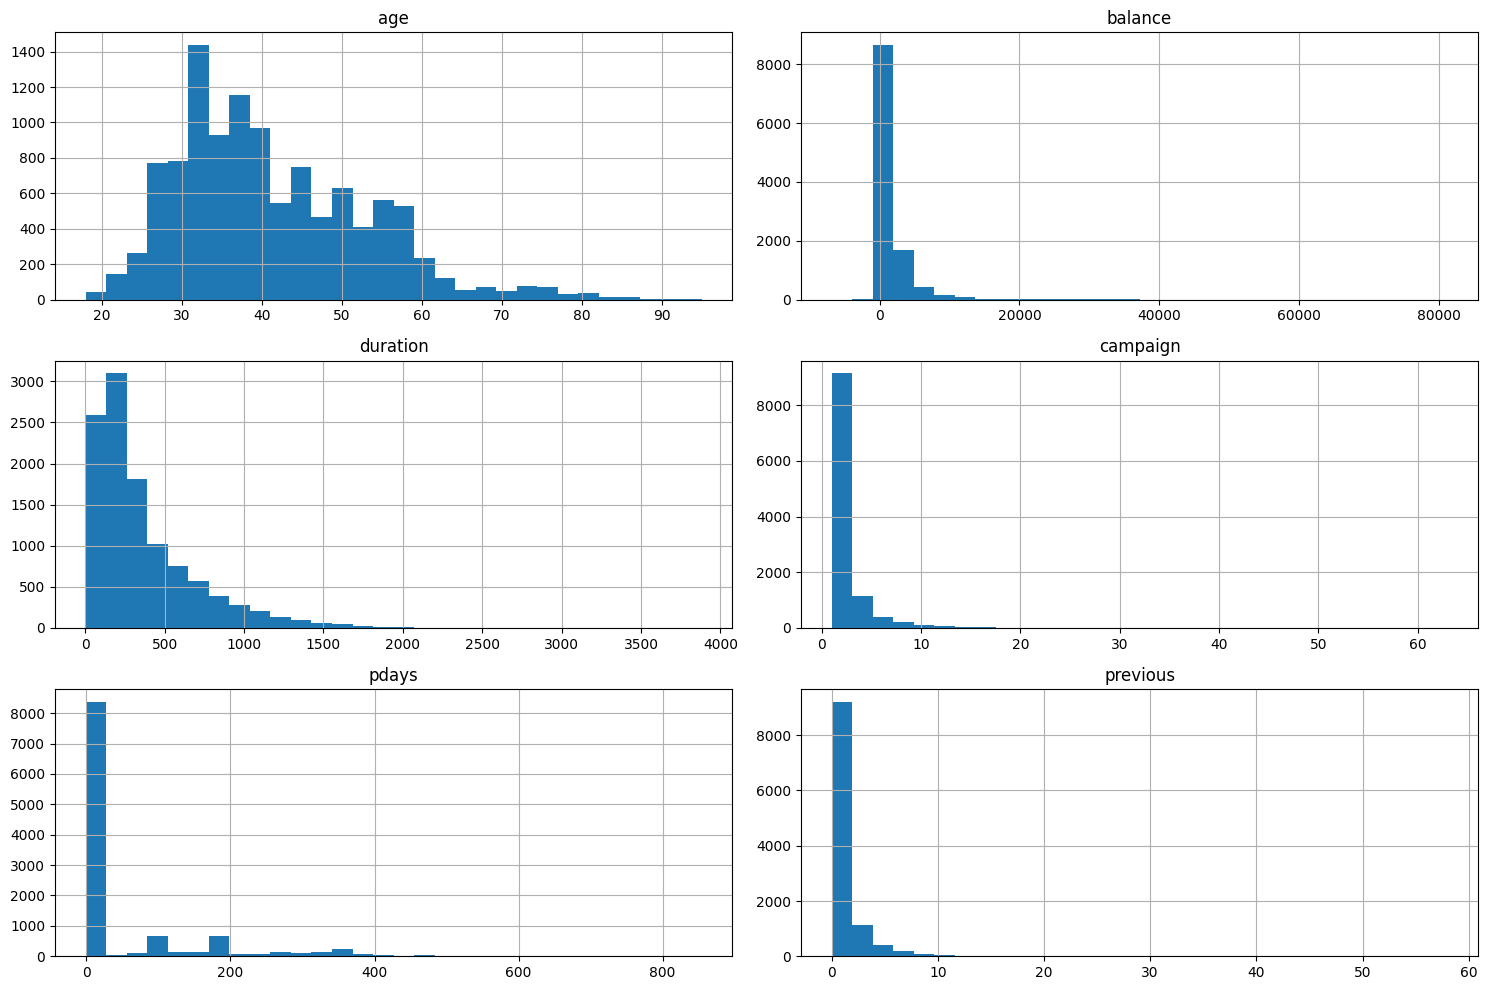

In [ ]:
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

np.int64(0)

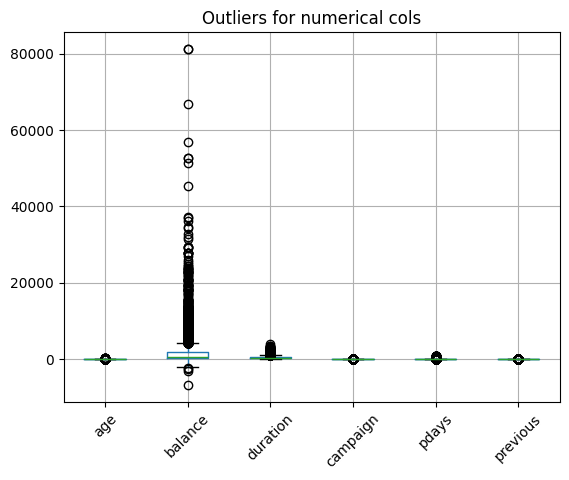

In [ ]:
display(df.isnull().sum().sum())

# check outliers
df[num_cols].boxplot()
plt.title('Outliers for numerical cols')
plt.xticks(rotation=45)
plt.show()

## Encoding

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

df_processed = df.copy()
for col in categorical_cols:
    df_processed[col] = LabelEncoder().fit_transform(df_processed[col].astype(str))

In [ ]:
df_processed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


## Modeling

In [ ]:
x = df_processed.drop('deposit', axis=1)
y = df_processed['deposit']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print(xtrain.shape)
print(xtest.shape)


(8929, 16)
(2233, 16)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
ypred = model.predict(xtest)

## Evalution

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1175
           1       0.83      0.87      0.85      1058

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



## Deployment

In [ ]:
fileName = 'Analysis of Banking Marketing Campaigns.sav'
pickle.dump(model, open(fileName, 'wb'))